In [1]:
words = open('../makemore/names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
min(len(w) for w in words)

2

In [4]:
max(len(w) for w in words)

15

In [22]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
#         print(ch1, ch2)

In [75]:
# sorted(b.items(), key = lambda kv: -kv[1])

In [15]:
import torch

In [76]:
N = torch.zeros((27,27), dtype=torch.int32)

In [77]:
chars = sorted(list(set(''.join(words))))

In [78]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}

In [79]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [80]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [81]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

In [82]:
# N

In [83]:
import matplotlib.pyplot as plt

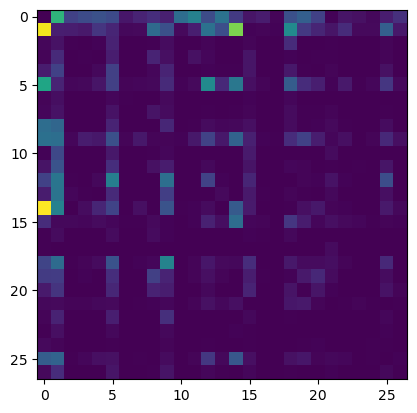

In [84]:
plt.imshow(N)

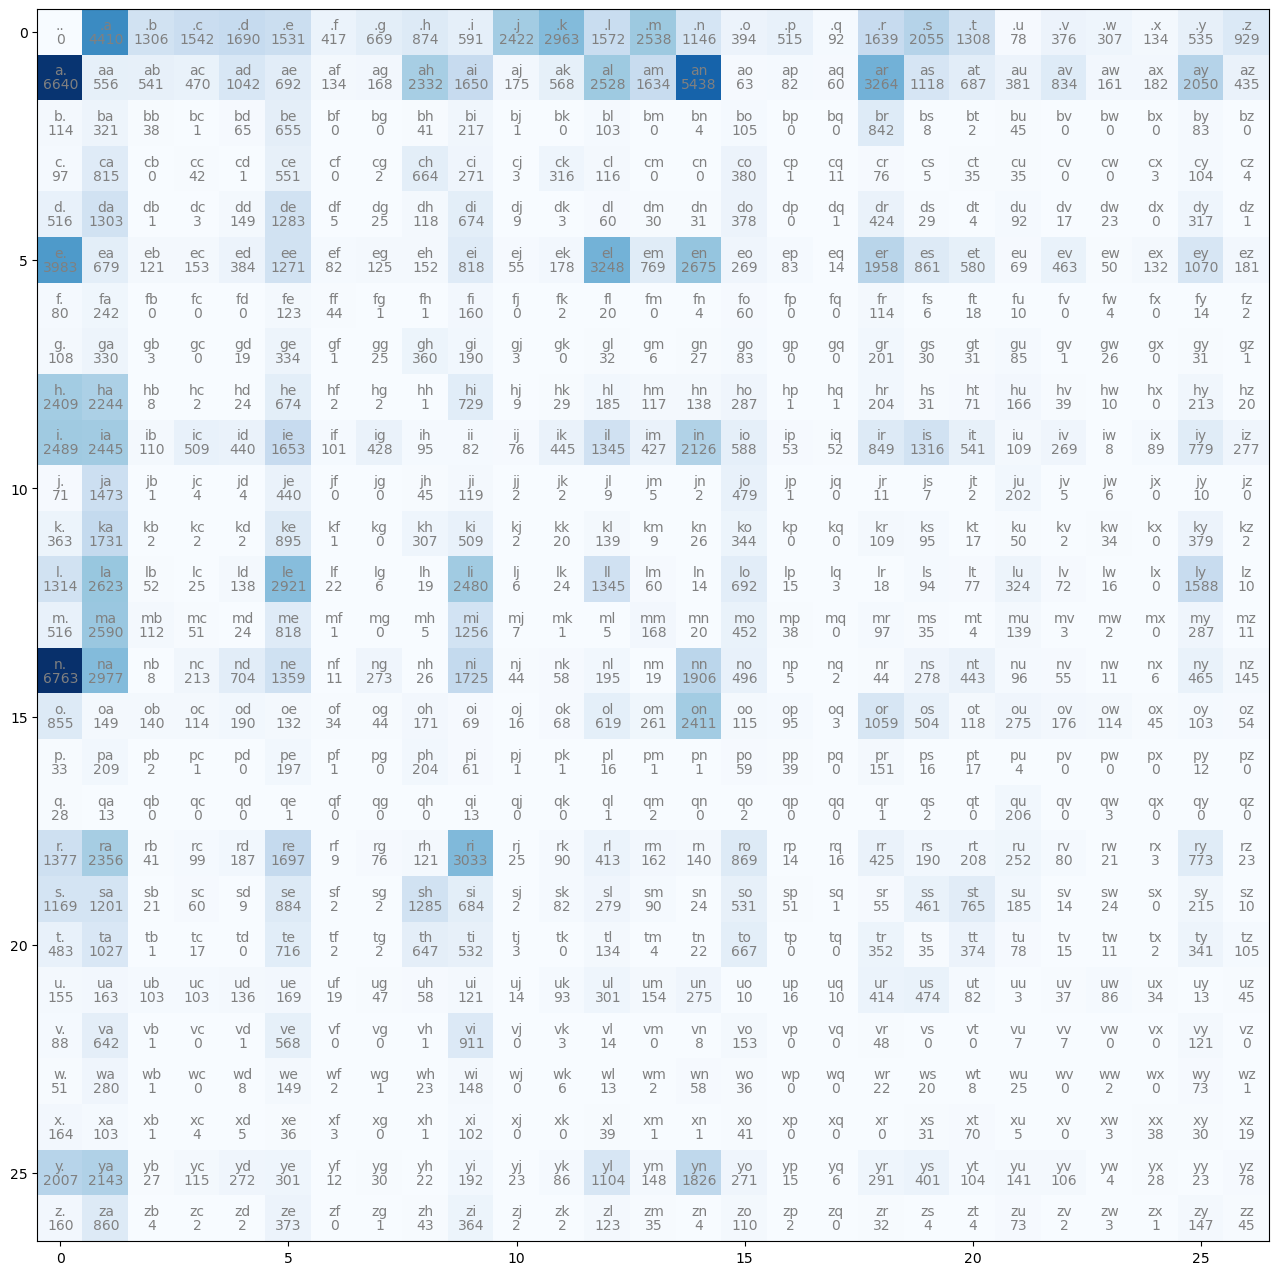

In [85]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j] # character string - bigrams in character representation
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray') # plot the bigram text
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray') # plot the no. of times a bigram occurs

# plt.axis('off');

## Sampling from this char-level bigram count / probability model we built

In [90]:
ix = 0 # coz, we start with .
N[ix] # give 1-d array of starting char after .

# we have to sample from this array

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [99]:
g = torch.Generator().manual_seed(2147483647)
ix = 0
while True:
    p = N[ix].float()
    p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    print(itos[ix])
    if ix == 0:
        break

j
u
n
i
d
e
.


In [70]:
torch.multinomial(p, num_samples=1, replacement=True, generator=g)

tensor([4])